AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 2.2 		 0.25 		 0.14 |
| 7.4 		 0.93 		 0.71 |
| 8.1 		 0.99 		 0.28 |
| 4.8 		 0.36 		 0.84 |
| 8.3 		 0.03 		 0.81 |
| 8.5 		 0.02 		 0.26 |
| 6.1 		 0.58 		 0.15 |
| 2.5 		 0.54 		 0.4 |
| 5.1 		 0.04 		 0.71 |
| 0.3 		 0.44 		 0.75 |
| 8.7 		 0.44 		 0.52 |
| 3.9 		 0.69 		 0.84 |
| 9.7 		 0.08 		 0.2 |
| 0.3 		 0.33 		 0.46 |
| 1.3 		 0.63 		 0.53 |
| 5.6 		 0.75 		 0.78 |
| 1.5 		 0.42 		 0.45 |
| 10.0 		 0.19 		 0.92 |
| 4.5 		 0.64 		 0.0 |
-------------------------------------
The s.d. of M is: 2.82
The s.d. of D is: 0.29
The s.d. of R is: 0.3
-------------------------------------
The mean of M is: 5.47
The mean of D is: 0.53
The mean of R is: 0.47
-------------------------------------


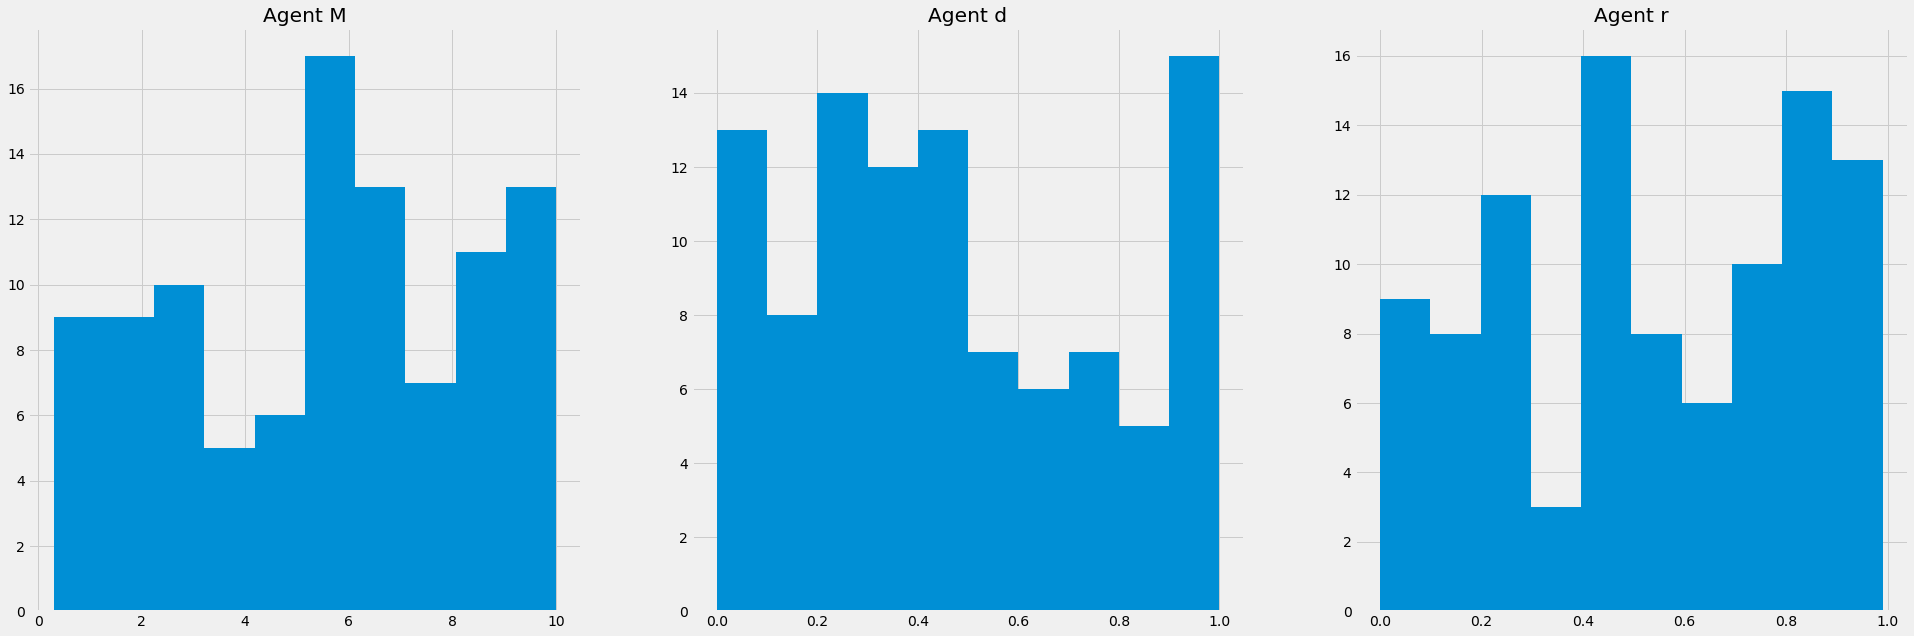

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 2.9, Temptation: 3.9, Sucker: 0, Punishment: 1.0
Agent 1 playing Agent 0: Reward: 3.6, Temptation: 5.2, Sucker: 0, Punishment: 1.6
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 3.2, Temptation: 4.3, Sucker: 0, Punishment: 1.1
Agent 2 playing Agent 0: Reward: 2.8, Temptation: 3.4, Sucker: 0, Punishment: 0.6
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 1.9, Temptation: 2.5, Sucker: 0, Punishment: 0.7
Agent 3 playing Agent 0: Reward: 2.6, Temptation: 4.5, Sucker: 0, Punishment: 1.8
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 3.2, Temptation: 4.4, Sucker: 0, Punishment: 1.2
Agent 4 playing Agent 

In [ ]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

tour_type = "hetero_mdr_sd_max"
M = [5, 12.5]
R = [0.4, 1.25]
D = [0.3, 1.25]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed), tour_type = tour_type)